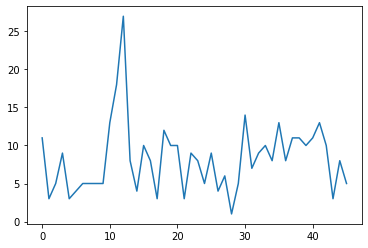

In [459]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from scipy.special import gamma
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import floor, log, sqrt
from numbers import Number
from statsmodels.graphics.tsaplots import plot_acf
import pymc3 as pm
import arviz as az
chptdat = pd.read_table("COUP551_rates.dat", sep="\s+", usecols=[0, 1], names = ["Time Bin", "Counts"], header=0)
Y = chptdat['Counts']
plt.plot(Y)

In [460]:
count_photon(0,1,Y)

11

In [517]:
def birth(change_points):
    return (3.6/7) * min(1, lambda_1/(change_points+1))
def death(change_points):
    return (3.6/7) * min(1, change_points/lambda_1)
def count_photon(s1, s2, Y):
    sum_v = 0
    for i in range(int(s1), int(s2)):
        sum_v += Y[i]
        

    return sum_v
# accept probability function for Height move
def alpha_hmove(s, h, h_tilde, j, Y,  a = 5, b=0.75):
        m = count_photon(s[j], s[j+1], Y)
        log_likelihood_ratio = (h[j] - h_tilde) * (s[j+1] - s[j]) + m*(log(h_tilde) - log(h[j]))
        log_prior_ratio = a * (log(h_tilde) - log(h[j])) - b * (h_tilde - h[j])
        log_pi_ratio = log_likelihood_ratio + log_prior_ratio
        return np.e**(log_pi_ratio)
# accept probability function for Position move
def alpha_smove(s, h, s_tilde, j, Y, a = 5,b= 0.75):
    m1 = count_photon(s[j-1], s[j], Y)
    m1_tilde = count_photon(s[j-1], s_tilde, Y)
    m2 = count_photon(s[j], s[j+1], Y)
    m2_tilde = count_photon(s_tilde,s[j+1], Y)
    log_likelihood_ratio = (h[j] - h[j-1]) * (s_tilde - s[j]) + (m1_tilde - m1) * log(h[j-1]) + (m2_tilde - m2) * log(h[j])
    log_prior_ratio = log(s_tilde - s[j-1]) + log(s[j+1] - s_tilde) - log((s[j] - s[j-1])) - log(s[j+1] - s[j])
    log_pi_ratio = log_likelihood_ratio + log_prior_ratio
    return np.e**(log_pi_ratio)

In [462]:
def move(n,h_initial,s_initial, Y, k=5):
    H = np.empty((n, k))
    S = np.empty((n,k+1))
    h = h_initial
    s = s_initial
    for i in range(n):
        j = random.randint(0,(2*k-1)-1)
        if (j <= k -1):#from 1 to k is for Height
            u = random.uniform(-0.5,0.5)
            h_tilde = h[j] * (np.exp(u))
            U = random.random()
            if (U < alpha_hmove(s,h,h_tilde,j,Y)):
                h[j] = h_tilde
        if (j >= k): #from k+1 to 2k-1 is for Position
            j = j - k + 1
            s_tilde = random.uniform(s[j-1],s[j+1])
            U = random.random()
            if (U < alpha_smove(s,h,s_tilde,j,Y)):
                s[j] = s_tilde
        H[i,] = h
        S[i,] = s
    X = [H,S]
    return X


In [525]:
s0 = [1, 10, 15, 30, 40, 45]
h0 = [5,5,5,5,5]

X= move(1000000,h0,s0,Y)

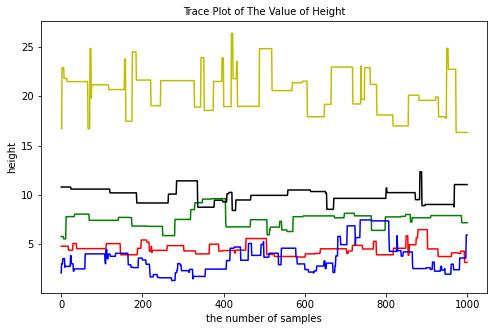

the mean value for theta is  4.502424042296459
the mean value for theta is  20.403352669159315
the mean value for theta is  7.549752902686245
the mean value for theta is  3.5926774904078256
the mean value for theta is  9.945886070396202


In [526]:
plt.figure(figsize=(8,5))
plt.plot(X[0][999000:,0],'r')
plt.plot(X[0][999000:,1],'y')
plt.plot(X[0][999000:,2],'g')
plt.plot(X[0][999000:,3],'b')
plt.plot(X[0][999000:,4],'k')
plt.title('Trace Plot of The Value of Height', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("height")
plt.show()
print("the mean value for theta is ", np.mean(X[0][999000:,0]))
print("the mean value for theta is ", np.mean(X[0][999000:,1]))
print("the mean value for theta is ", np.mean(X[0][999000:,2]))
print("the mean value for theta is ", np.mean(X[0][999000:,3]))
print("the mean value for theta is ", np.mean(X[0][999000:,4]))

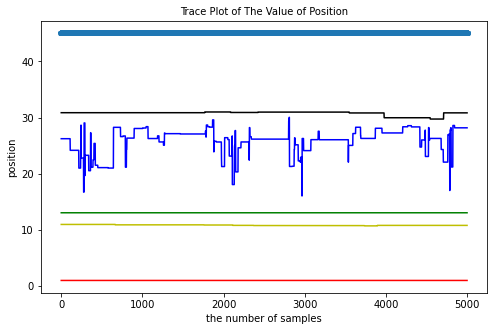

the position for cp is  10.80351402536693
the position for cp is  13.051372286747903
the position for cp is  26.730429945112913
the position for cp is  30.186865734217623


In [528]:
plt.figure(figsize=(8,5))
plt.plot(X[1][995000:,0],'r')
plt.plot(X[1][995000:,1],'y')
plt.plot(X[1][995000:,2],'g')
plt.plot(X[1][995000:,3],'b')
plt.plot(X[1][995000:,4],'k')
plt.plot(X[1][995000:,5],'p')
plt.title('Trace Plot of The Value of Position', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("position")
plt.show()
print("the position for cp is ", np.mean(X[1][999000:,1]))
print("the position for cp is ", np.mean(X[1][999000:,2]))
print("the position for cp is ", np.mean(X[1][999000:,3]))
print("the position for cp is ", np.mean(X[1][999000:,4]))


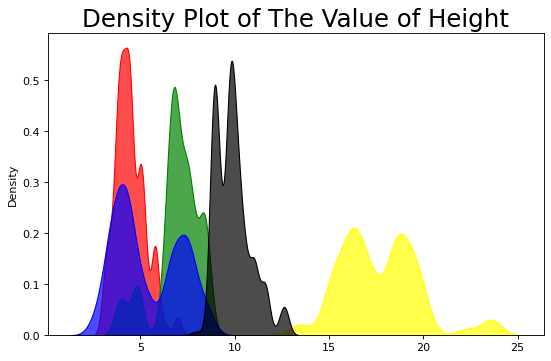

In [466]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X[0][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X[0][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X[0][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X[0][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X[0][999000:,4], shade=True, color="black", label="Cyl=8", alpha=.7)

plt.title('Density Plot of The Value of Height', fontsize=22)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


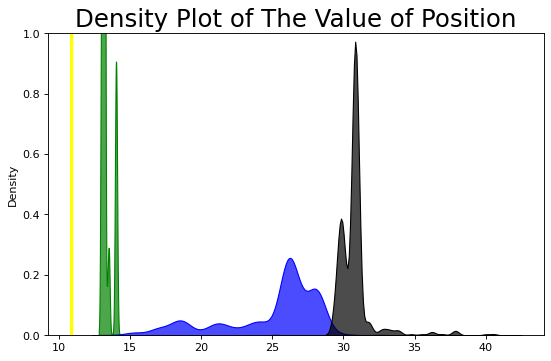

In [467]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X[1][995000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X[1][995000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X[1][995000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X[1][995000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X[1][995000:,4], shade=True, color="black", label="Cyl=8", alpha=.7)
sns.kdeplot(X[1][995000:,5], shade=True, color="orange", label="Cyl=8", alpha=.7)
plt.title('Density Plot of The Value of Position', fontsize=22)
plt.ylim(0,1)
plt.show()

In [468]:
s0 = [1, 10, 15, 23, 45]
h0 = [5,5,5,5]

X2= move(1000000,h0,s0,Y,4)

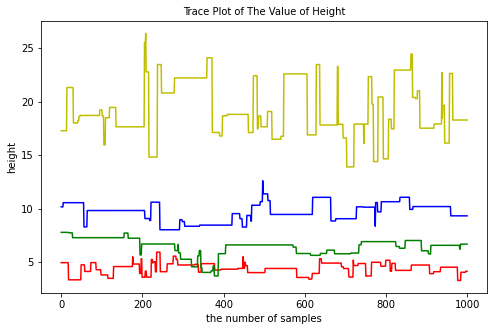

In [469]:
plt.figure(figsize=(8,5))
plt.plot(X2[0][999000:,0],'r')
plt.plot(X2[0][999000:,1],'y')
plt.plot(X2[0][999000:,2],'g')
plt.plot(X2[0][999000:,3],'b')

plt.title('Trace Plot of The Value of Height', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("height")
plt.show()

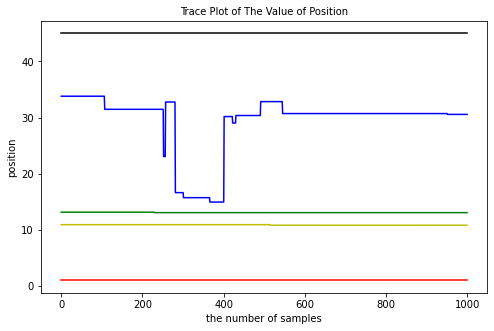

In [470]:
plt.figure(figsize=(8,5))
plt.plot(X2[1][999000:,0],'r')
plt.plot(X2[1][999000:,1],'y')
plt.plot(X2[1][999000:,2],'g')
plt.plot(X2[1][999000:,3],'b')
plt.plot(X2[1][999000:,4],'k')

plt.title('Trace Plot of The Value of Position', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("position")
plt.show()

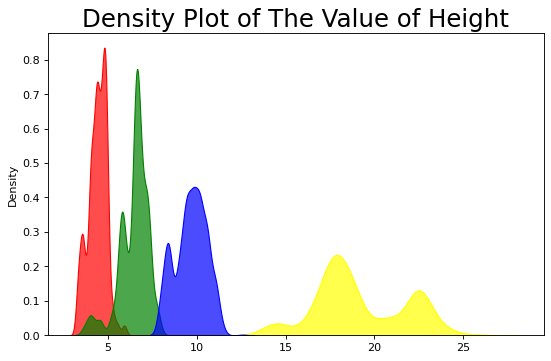

In [471]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X2[0][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X2[0][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X2[0][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X2[0][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)

plt.title('Density Plot of The Value of Height', fontsize=22)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


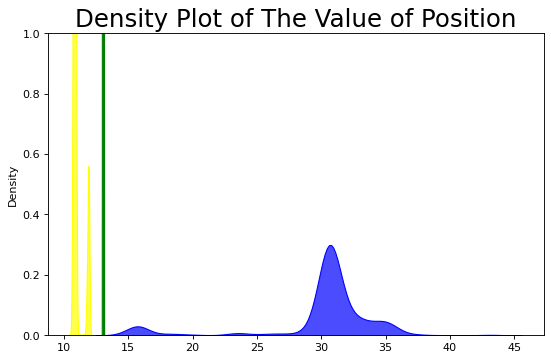

In [472]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X2[1][995000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X2[1][995000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X2[1][995000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X2[1][995000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X2[1][995000:,4], shade=True, color="black", label="Cyl=8", alpha=.7)

plt.title('Density Plot of The Value of Position', fontsize=22)
plt.ylim(0,1)
plt.show()

In [531]:
s0 = [1, 10, 15, 23, 45]
h0 = [5,5,5,5]

X2= move(1000000,h0,s0,Y,4)

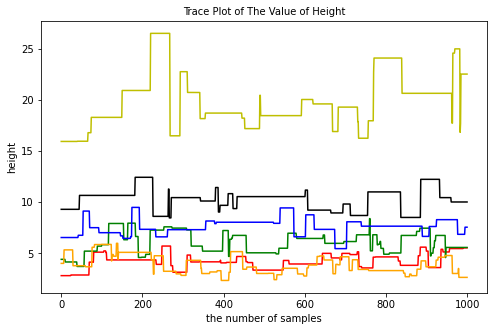

the mean value for theta is  4.207433170922791
the mean value for theta is  19.818799701847773
the mean value for theta is  6.0930500200321
the mean value for theta is  7.577023707788012
the mean value for theta is  3.9035871020717128
the mean value for theta is  10.247395879761537


In [530]:
plt.figure(figsize=(8,5))
plt.plot(X3[0][999000:,0],'r')
plt.plot(X3[0][999000:,1],'y')
plt.plot(X3[0][999000:,2],'g')
plt.plot(X3[0][999000:,3],'b')
plt.plot(X3[0][999000:,4],'orange')
plt.plot(X3[0][999000:,5],'k')

plt.title('Trace Plot of The Value of Height', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("height")
plt.show()
print("the mean value for theta is ", np.mean(X3[0][999000:,0]))
print("the mean value for theta is ", np.mean(X3[0][999000:,1]))
print("the mean value for theta is ", np.mean(X3[0][999000:,2]))
print("the mean value for theta is ", np.mean(X3[0][999000:,3]))
print("the mean value for theta is ", np.mean(X3[0][999000:,4]))
print("the mean value for theta is ", np.mean(X3[0][999000:,5]))

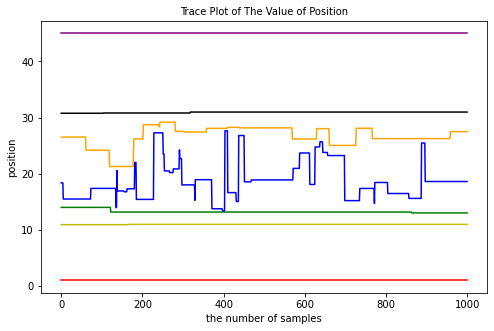

the position for cp is  10.971960495374507
the position for cp is  13.261071540025066
the position for cp is  18.634410732460825
the position for cp is  26.661361255379816
the position for cp is  30.928003724642032


In [529]:
plt.figure(figsize=(8,5))
plt.plot(X3[1][999000:,0],'r')
plt.plot(X3[1][999000:,1],'y')
plt.plot(X3[1][999000:,2],'g')
plt.plot(X3[1][999000:,3],'b')
plt.plot(X3[1][999000:,4],'orange')
plt.plot(X3[1][999000:,5],'k')
plt.plot(X3[1][999000:,6],'purple')
plt.title('Trace Plot of The Value of Position', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("position")
plt.show()
print("the position for cp is ", np.mean(X3[1][999000:,1]))
print("the position for cp is ", np.mean(X3[1][999000:,2]))
print("the position for cp is ", np.mean(X3[1][999000:,3]))
print("the position for cp is ", np.mean(X3[1][999000:,4]))
print("the position for cp is ", np.mean(X3[1][999000:,5]))


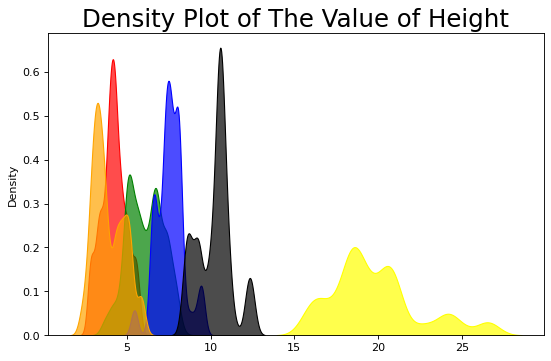

In [476]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X3[0][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X3[0][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X3[0][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X3[0][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X3[0][999000:,4], shade=True, color="orange", label="Cyl=4", alpha=.7)
sns.kdeplot(X3[0][999000:,5], shade=True, color="black", label="Cyl=5", alpha=.7)


plt.title('Density Plot of The Value of Height', fontsize=22)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


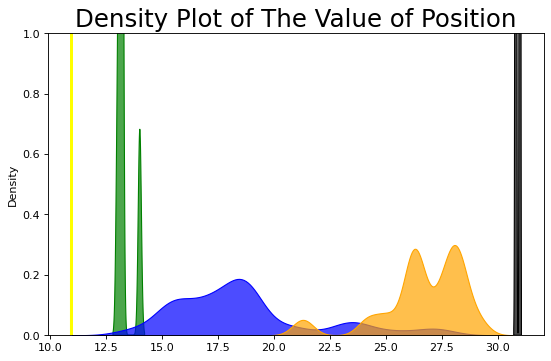

In [477]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X3[1][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X3[1][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X3[1][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X3[1][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X3[1][999000:,4], shade=True, color="orange", label="Cyl=4", alpha=.7)
sns.kdeplot(X3[1][999000:,5], shade=True, color="black", label="Cyl=5", alpha=.7)
sns.kdeplot(X3[1][999000:,6], shade=True, color="purple", label="Cyl=5", alpha=.7)
plt.title('Density Plot of The Value of Position', fontsize=22)
plt.ylim(0,1)
plt.show()

In [479]:
s0 = [1,  15, 23, 45]
h0 = [5,5,5]

X4= move(1000000,h0,s0,Y,3)

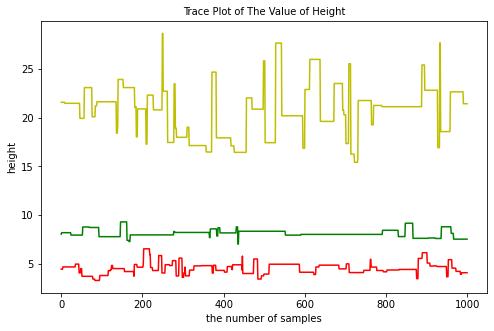

In [480]:
plt.figure(figsize=(8,5))
plt.plot(X4[0][999000:,0],'r')
plt.plot(X4[0][999000:,1],'y')
plt.plot(X4[0][999000:,2],'g')

plt.title('Trace Plot of The Value of Height', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("height")
plt.show()

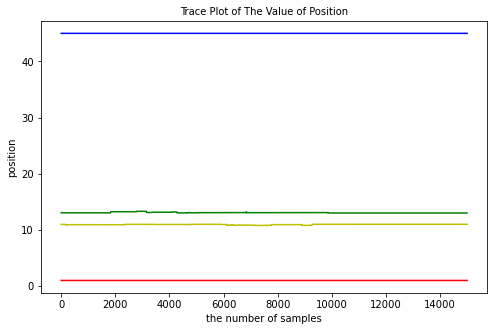

In [483]:
plt.figure(figsize=(8,5))
plt.plot(X4[1][985000:,0],'r')
plt.plot(X4[1][985000:,1],'y')
plt.plot(X4[1][985000:,2],'g')
plt.plot(X4[1][985000:,3],'b')

plt.title('Trace Plot of The Value of Position', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("position")
plt.show()

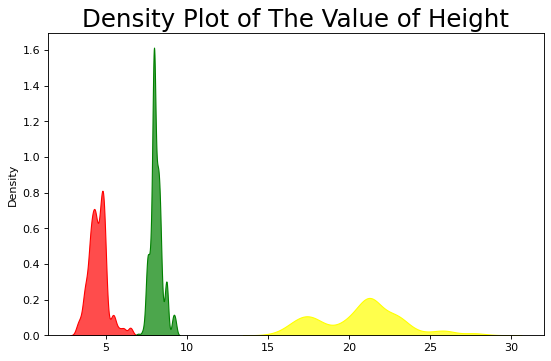

In [484]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X4[0][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X4[0][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X4[0][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)



plt.title('Density Plot of The Value of Height', fontsize=22)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


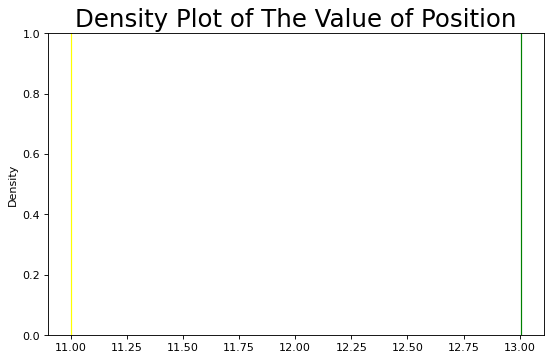

In [486]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X4[1][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X4[1][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X4[1][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X4[1][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)


plt.title('Density Plot of The Value of Position', fontsize=22)
plt.ylim(0,1)
plt.show()

In [488]:
s0 = [1,  25, 45]
h0 = [5,5]

X5= move(1000000,h0,s0,Y,2)

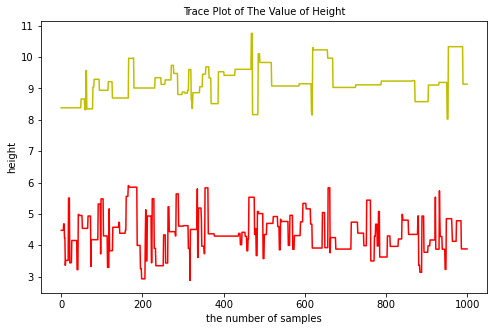

In [489]:
plt.figure(figsize=(8,5))
plt.plot(X5[0][999000:,0],'r')
plt.plot(X5[0][999000:,1],'y')


plt.title('Trace Plot of The Value of Height', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("height")
plt.show()

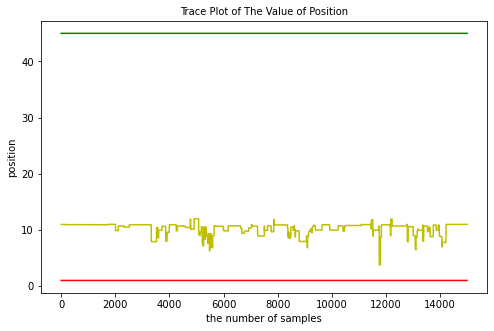

In [490]:
plt.figure(figsize=(8,5))
plt.plot(X5[1][985000:,0],'r')
plt.plot(X5[1][985000:,1],'y')
plt.plot(X5[1][985000:,2],'g')


plt.title('Trace Plot of The Value of Position', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("position")
plt.show()

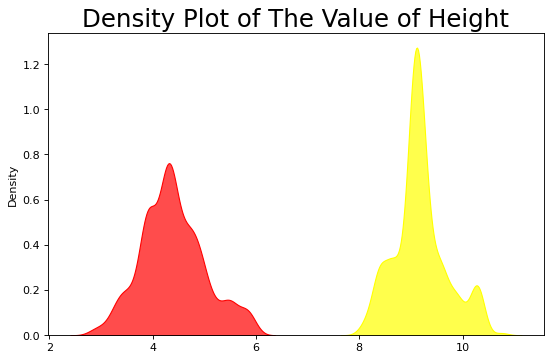

In [491]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X5[0][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X5[0][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)




plt.title('Density Plot of The Value of Height', fontsize=22)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


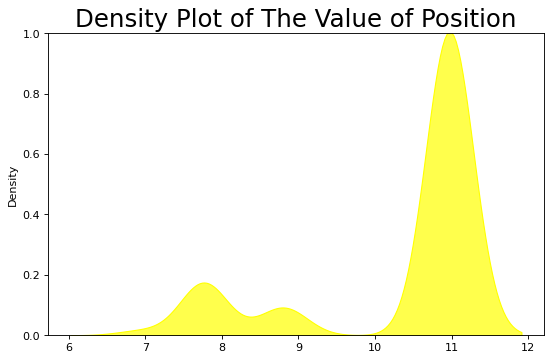

In [492]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X5[1][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X5[1][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X5[1][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)



plt.title('Density Plot of The Value of Position', fontsize=22)
plt.ylim(0,1)
plt.show()

In [534]:
s0 = [1,10,15,20,25,30,35,45]
h0 = [5,5,5,5,5,5,5]

X6= move(1000000,h0,s0,Y,7)

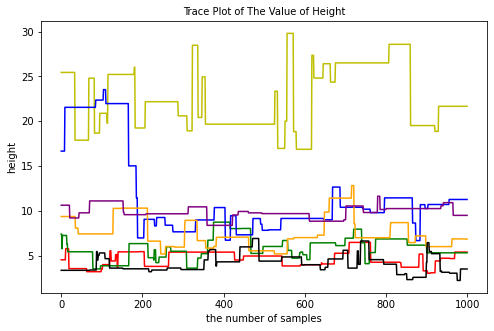

the mean value for theta is  4.635119969483901
the mean value for theta is  22.505599280963615
the mean value for theta is  5.870266247234331
the mean value for theta is  11.566754077044505
the mean value for theta is  7.531706713723117
the mean value for theta is  4.084328733495609
the mean value for theta is  9.861565931447014


In [535]:
plt.figure(figsize=(8,5))
plt.plot(X6[0][999000:,0],'r')
plt.plot(X6[0][999000:,1],'y')
plt.plot(X6[0][999000:,2],'g')
plt.plot(X6[0][999000:,3],'b')
plt.plot(X6[0][999000:,4],'orange')
plt.plot(X6[0][999000:,5],'k')
plt.plot(X6[0][999000:,6],'purple')
plt.title('Trace Plot of The Value of Height', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("height")
plt.show()
print("the mean value for theta is ", np.mean(X6[0][999000:,0]))
print("the mean value for theta is ", np.mean(X6[0][999000:,1]))
print("the mean value for theta is ", np.mean(X6[0][999000:,2]))
print("the mean value for theta is ", np.mean(X6[0][999000:,3]))
print("the mean value for theta is ", np.mean(X6[0][999000:,4]))
print("the mean value for theta is ", np.mean(X6[0][999000:,5]))
print("the mean value for theta is ", np.mean(X6[0][999000:,6]))

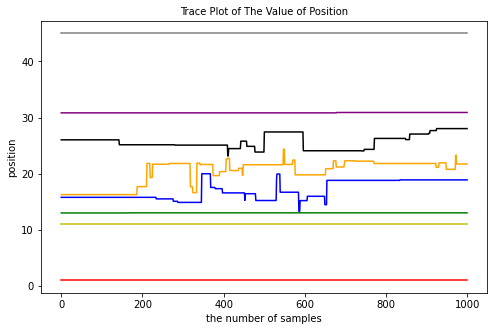

the position for cp is  10.98448517619096
the position for cp is  13.036775556585969
the position for cp is  17.018433828192837
the position for cp is  20.31268963073888
the position for cp is  25.717778977449445
the position for cp is  30.862967282235722
the position for cp is  45.0


In [537]:
plt.figure(figsize=(8,5))
plt.plot(X6[1][999000:,0],'r')
plt.plot(X6[1][999000:,1],'y')
plt.plot(X6[1][999000:,2],'g')
plt.plot(X6[1][999000:,3],'b')
plt.plot(X6[1][999000:,4],'orange')
plt.plot(X6[1][999000:,5],'k')
plt.plot(X6[1][999000:,6],'purple')
plt.plot(X6[1][999000:,7],'grey')
plt.title('Trace Plot of The Value of Position', fontsize=10)
plt.xlabel("the number of samples")
plt.ylabel("position")
plt.show()
print("the position for cp is ", np.mean(X6[1][999000:,1]))
print("the position for cp is ", np.mean(X6[1][999000:,2]))
print("the position for cp is ", np.mean(X6[1][999000:,3]))
print("the position for cp is ", np.mean(X6[1][999000:,4]))
print("the position for cp is ", np.mean(X6[1][999000:,5]))
print("the position for cp is ", np.mean(X6[1][999000:,6]))
print("the position for cp is ", np.mean(X6[1][999000:,7]))

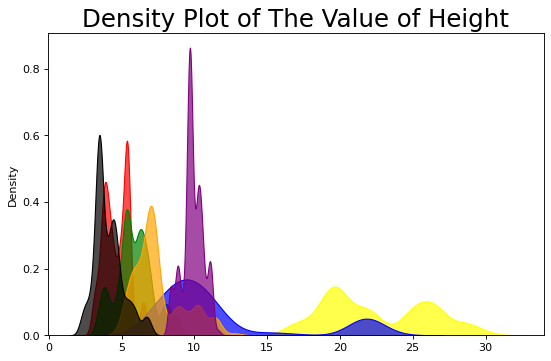

In [539]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X6[0][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X6[0][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X6[0][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X6[0][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X6[0][999000:,4], shade=True, color="orange", label="Cyl=4", alpha=.7)
sns.kdeplot(X6[0][999000:,5], shade=True, color="black", label="Cyl=5", alpha=.7)
sns.kdeplot(X6[0][999000:,6], shade=True, color="purple", label="Cyl=5", alpha=.7)
plt.title('Density Plot of The Value of Height', fontsize=22)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


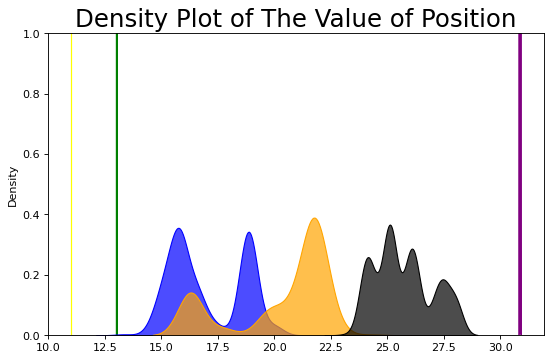

In [540]:
plt.figure(figsize=(8,5), dpi= 80)
sns.kdeplot(X6[1][999000:,0], shade=True, color="red", label="Cyl=4", alpha=.7)
sns.kdeplot(X6[1][999000:,1], shade=True, color="yellow", label="Cyl=5", alpha=.7)
sns.kdeplot(X6[1][999000:,2], shade=True, color="green", label="Cyl=6", alpha=.7)
sns.kdeplot(X6[1][999000:,3], shade=True, color="blue", label="Cyl=8", alpha=.7)
sns.kdeplot(X6[1][999000:,4], shade=True, color="orange", label="Cyl=4", alpha=.7)
sns.kdeplot(X6[1][999000:,5], shade=True, color="black", label="Cyl=5", alpha=.7)
sns.kdeplot(X6[1][999000:,6], shade=True, color="purple", label="Cyl=5", alpha=.7)
sns.kdeplot(X6[1][999000:,7], shade=True, color="grey", label="Cyl=5", alpha=.7)
plt.title('Density Plot of The Value of Position', fontsize=22)
plt.ylim(0,1)
plt.show()